## Sentiment Prediction using Random Forest Classifier & SVM

In [61]:
import spacy
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load pre-processed data
df = pd.read_csv("data_cleaned_all.csv")
df.sample(3)

,Unnamed: 0,site,stars,title,text,text_clean,text_sid_vader_neg,text_sid_vader_neu,text_sid_vader_pos,text_sid_vader_compound,text_sid_textblob_polarity
1444,1444,www.ebay.com,2,I'm so disappointed and Very Mad,I'm so disappointed and Very Mad ordering thin...,i'm so disappoint and veri mad order thing off...,0.150,0.782,0.068,-0.8221,-0.1375
4557,4557,www.facebook.com,4,in need for some accessible options,Good application. I have read that you can sta...,good applic i have read that you can start a s...,0.079,0.863,0.058,-0.1815,0.1500
4246,4246,www.google.com,4,Ladylux salon,"Pleased with nice cut from Nicola, she knew wh...",pleas with nice cut from nicola she knew what ...,0.117,0.726,0.156,0.1779,0.6000


In [62]:
# Additional data formatting and adding of the target column
df.drop(['Unnamed: 0', 'site', 'title','text_sid_vader_neg','text_sid_vader_neu','text_sid_vader_pos'], inplace=True, axis=1)
df.loc[df['stars'] <= 2, 'sentiment'] = -1
df.loc[df['stars'] == 3, 'sentiment'] = 0
df.loc[df['stars'] >= 4, 'sentiment'] = 1

df.sample(3)

,stars,text,text_clean,text_sid_vader_compound,text_sid_textblob_polarity,sentiment
361,1,Ebay is full of bandits. if you try to sell so...,ebay is full of bandit if you tri to sell some...,-0.9306,0.175000,-1.0
4030,4,Philip was great! Knowledgeable and patient. H...,philip was great knowledg and patient he help ...,0.6336,0.800000,1.0
1135,1,I've been a loyal customer for over 12 years...,i'v been a loyal custom for over 12 year been ...,0.7579,0.055556,-1.0


#### Downloading large spacy model (~1min)

In [64]:
%%capture
!python -m spacy download en_core_web_lg

#### Tokenizing and vectorizing data with spaCy (~1min20s)

In [65]:
nlp = spacy.load('en_core_web_lg')

def vectorize_text(text):
    doc = nlp(text)
    return doc.vector

df['text_vector'] = df['text_clean'].apply(vectorize_text)
df.head()

,stars,text,text_clean,text_sid_vader_compound,text_sid_textblob_polarity,sentiment,text_vector
0,1,With just one device connected 4G+ speed 90mbp...,with just one devic connect 4g speed 90mbps do...,-0.4497,-0.075556,-1.0,"[0.047985982, 0.18046616, -0.12221394, -0.0184..."
1,1,Very very very bad institution established on ...,veri veri veri bad institut establish on lie a...,-0.8074,-0.700000,-1.0,"[-0.018163197, 0.0702172, -0.18188098, -0.0809..."
2,1,Do not buy from eaflyer-0/Logan Thompson under...,do not buy from eaflyer-0/logan thompson under...,0.0000,0.000000,-1.0,"[-0.019247098, 0.12531255, -0.20478028, 0.0374..."
3,1,Sold a set of 50 State Quarters Coin & Die set...,sold a set of 50 state quarter coin die set bu...,-0.5719,0.100000,-1.0,"[-0.012113103, 0.18576728, -0.19512364, -0.038..."
4,1,Why do I not sell on eBay because of one word ...,whi do i not sell on ebay becaus of one word –...,0.0000,0.000000,-1.0,"[-0.12315243, 0.16000786, -0.094708346, -0.027..."


#### Training models and evaluating them (Random Forest Classifier & Support Vector Machine)

In [66]:
# Features & Target
X = df['text_vector'].tolist()
Y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
# Fit & predict 
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.76      0.74      0.75       513
         0.0       0.38      0.19      0.26       212
         1.0       0.68      0.84      0.75       475

    accuracy                           0.69      1200
   macro avg       0.61      0.59      0.59      1200
weighted avg       0.66      0.69      0.66      1200



In [69]:
# Fit & predict
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.75      0.85      0.80       513
         0.0       0.49      0.26      0.34       212
         1.0       0.78      0.84      0.81       475

    accuracy                           0.74      1200
   macro avg       0.67      0.65      0.65      1200
weighted avg       0.72      0.74      0.72      1200



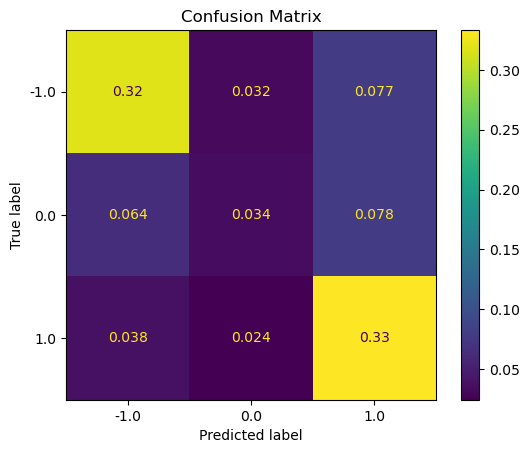

In [70]:
# Confusion matrix with false positives and false negatives
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, normalize="all")
plt.title("Confusion Matrix")
plt.show()